In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the datasets

In [3]:
finance =pd.read_excel('DataAnalystSampleData.xlsx',sheet_name=['Sales','Promotions','Inventory'])

Clone the dataframes and check out the contents

In [4]:
sales_df = finance['Sales'].copy()
sales_df.head()

,SiteId,TransactionDayId,TransactionId,ProductId,Quantity
0,28,20210528,69581695,39,1
1,26,20210528,69582137,39,4
2,24,20210528,69582946,39,1
3,24,20210528,69589904,39,1
4,24,20210528,69589904,39,1


In [5]:
promotions_df = finance['Promotions'].copy()
promotions_df.head()

,StartDayId,EndDayId,ProgramId,ProductId,StatusName
0,20210621,20210801,3,5,Deleted
1,20210621,20210801,12,62,Invoiced
2,20210510,20210620,3,102,Invoiced
3,20210621,20210801,3,120,Invoiced
4,20210621,20210801,3,148,Invoiced


In [6]:
inventory_df =finance['Inventory'].copy()
inventory_df.head()

,SiteId,DayId,ProductId,QtyOnHand
0,23,20210329,1,0
1,23,20210329,2,0
2,23,20210329,3,0
3,23,20210329,4,0
4,23,20210329,5,0


Check the number of rows and columns of each dataframe

In [7]:
sales_df.shape

(812808, 5)

In [8]:
promotions_df.shape

(2732, 5)

In [9]:
inventory_df.shape

(1048575, 4)

To find out the Datatypes and number of not-null values in each dataframe

In [10]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812808 entries, 0 to 812807
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   SiteId            812808 non-null  int64
 1   TransactionDayId  812808 non-null  int64
 2   TransactionId     812808 non-null  int64
 3   ProductId         812808 non-null  int64
 4   Quantity          812808 non-null  int64
dtypes: int64(5)
memory usage: 31.0 MB


In [11]:
promotions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StartDayId  2732 non-null   int64 
 1   EndDayId    2732 non-null   int64 
 2   ProgramId   2732 non-null   int64 
 3   ProductId   2732 non-null   int64 
 4   StatusName  2732 non-null   object
dtypes: int64(4), object(1)
memory usage: 106.8+ KB


In [12]:
inventory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   SiteId     1048575 non-null  int64
 1   DayId      1048575 non-null  int64
 2   ProductId  1048575 non-null  int64
 3   QtyOnHand  1048575 non-null  int64
dtypes: int64(4)
memory usage: 32.0 MB


Check out for duplicate in the rows of each dataframe and remove them if they exist.

In [13]:
sales_df.duplicated().sum()

127853

Remove the duplicated rows

In [14]:
sales_df.drop_duplicates(inplace =True)
sales_df.duplicated().sum()

0

In [15]:
promotions_df.duplicated().sum()

51

In [16]:
promotions_df.drop_duplicates(inplace =True)
promotions_df.duplicated().sum()

0

In [17]:
inventory_df.duplicated().sum()

0

In [18]:
#Check the number of rows after the data cleaning
sales_df.shape

(684955, 5)

In [19]:
promotions_df.shape

(2681, 5)

Convert the Transaction Day ID column in sales_df from int to date format

In [20]:
sales_df['TransactionDayId']=sales_df['TransactionDayId'].astype(str)
sales_df.head()

,SiteId,TransactionDayId,TransactionId,ProductId,Quantity
0,28,20210528,69581695,39,1
1,26,20210528,69582137,39,4
2,24,20210528,69582946,39,1
3,24,20210528,69589904,39,1
5,24,20210528,69590512,39,1


In [21]:
sales_df['TransactionDayId']=pd.to_datetime(sales_df['TransactionDayId'],format='%Y%m%d')
sales_df.head()

,SiteId,TransactionDayId,TransactionId,ProductId,Quantity
0,28,2021-05-28,69581695,39,1
1,26,2021-05-28,69582137,39,4
2,24,2021-05-28,69582946,39,1
3,24,2021-05-28,69589904,39,1
5,24,2021-05-28,69590512,39,1


In [22]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684955 entries, 0 to 812806
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   SiteId            684955 non-null  int64         
 1   TransactionDayId  684955 non-null  datetime64[ns]
 2   TransactionId     684955 non-null  int64         
 3   ProductId         684955 non-null  int64         
 4   Quantity          684955 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 31.4 MB


In [23]:
promotions_df['StartDayId']= promotions_df['StartDayId'].astype(str)
promotions_df['EndDayId']=promotions_df['EndDayId'].astype(str)


In [24]:
promotions_df['StartDayId']=pd.to_datetime(promotions_df['StartDayId'],format='%Y%m%d')
promotions_df['EndDayId']=pd.to_datetime(promotions_df['EndDayId'],format='%Y%m%d')
promotions_df.head()

,StartDayId,EndDayId,ProgramId,ProductId,StatusName
0,2021-06-21,2021-08-01,3,5,Deleted
1,2021-06-21,2021-08-01,12,62,Invoiced
2,2021-05-10,2021-06-20,3,102,Invoiced
3,2021-06-21,2021-08-01,3,120,Invoiced
4,2021-06-21,2021-08-01,3,148,Invoiced


In [25]:
promotions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2681 entries, 0 to 2731
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   StartDayId  2681 non-null   datetime64[ns]
 1   EndDayId    2681 non-null   datetime64[ns]
 2   ProgramId   2681 non-null   int64         
 3   ProductId   2681 non-null   int64         
 4   StatusName  2681 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 125.7+ KB


Convert the DayID column in inventory dataframe to date format. 

In [26]:
inventory_df['DayId']=inventory_df['DayId'].astype(str)
inventory_df['DayId']=pd.to_datetime(inventory_df['DayId'],format='%Y%m%d')


In [27]:
inventory_df.head()

,SiteId,DayId,ProductId,QtyOnHand
0,23,2021-03-29,1,0
1,23,2021-03-29,2,0
2,23,2021-03-29,3,0
3,23,2021-03-29,4,0
4,23,2021-03-29,5,0


Remove rows that have zero value on the column qtyonhand

In [28]:
inventory_df = inventory_df[inventory_df.QtyOnHand > 0]
inventory_df.head()

,SiteId,DayId,ProductId,QtyOnHand
38,23,2021-03-29,39,87
65,23,2021-03-29,66,49
70,23,2021-03-29,71,6
101,23,2021-03-29,102,8
119,23,2021-03-29,120,18


In [29]:
sales_df = sales_df[sales_df.Quantity > 0]
sales_df.head()

,SiteId,TransactionDayId,TransactionId,ProductId,Quantity
0,28,2021-05-28,69581695,39,1
1,26,2021-05-28,69582137,39,4
2,24,2021-05-28,69582946,39,1
3,24,2021-05-28,69589904,39,1
5,24,2021-05-28,69590512,39,1


product_sales

In [30]:
inventory_df.shape

(111612, 4)

In [31]:
sales_df.head()

,SiteId,TransactionDayId,TransactionId,ProductId,Quantity
0,28,2021-05-28,69581695,39,1
1,26,2021-05-28,69582137,39,4
2,24,2021-05-28,69582946,39,1
3,24,2021-05-28,69589904,39,1
5,24,2021-05-28,69590512,39,1


In [32]:
sales_df.TransactionDayId.sort_values(ascending=False)

1730     2121-05-05
505139   2021-06-27
435235   2021-06-27
211820   2021-06-27
435230   2021-06-27
            ...    
185885   2021-03-29
185884   2021-03-29
314802   2021-03-29
314803   2021-03-29
544204   2021-03-29
Name: TransactionDayId, Length: 684252, dtype: datetime64[ns]

In [33]:
sales_df.TransactionDayId.value_counts(ascending=True)

2121-05-05        1
2021-04-18     2294
2021-04-25     2318
2021-05-30     2399
2021-04-05     2400
              ...  
2021-05-14    15486
2021-04-03    16174
2021-05-21    16705
2021-06-18    16835
2021-04-01    17117
Name: TransactionDayId, Length: 89, dtype: int64

In [34]:
sales_df.TransactionDayId.value_counts(ascending=True)

2121-05-05        1
2021-04-18     2294
2021-04-25     2318
2021-05-30     2399
2021-04-05     2400
              ...  
2021-05-14    15486
2021-04-03    16174
2021-05-21    16705
2021-06-18    16835
2021-04-01    17117
Name: TransactionDayId, Length: 89, dtype: int64

In [35]:
filteredsales_df =sales_df[sales_df.TransactionDayId !='2121-05-05']

Quantity of sales daily

In [36]:
daily_sales =filteredsales_df.groupby('TransactionDayId', as_index=False).agg({"Quantity": "sum"})
#data.groupby('TransactionDayId', as_index=False).agg({"Quantity": "sum"})

In [37]:
daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   TransactionDayId  88 non-null     datetime64[ns]
 1   Quantity          88 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [38]:
daily_sales.tail()

,TransactionDayId,Quantity
83,2021-06-23,7917
84,2021-06-24,12328
85,2021-06-25,15921
86,2021-06-26,12962
87,2021-06-27,3295


Text(0, 0.5, 'Quantity')

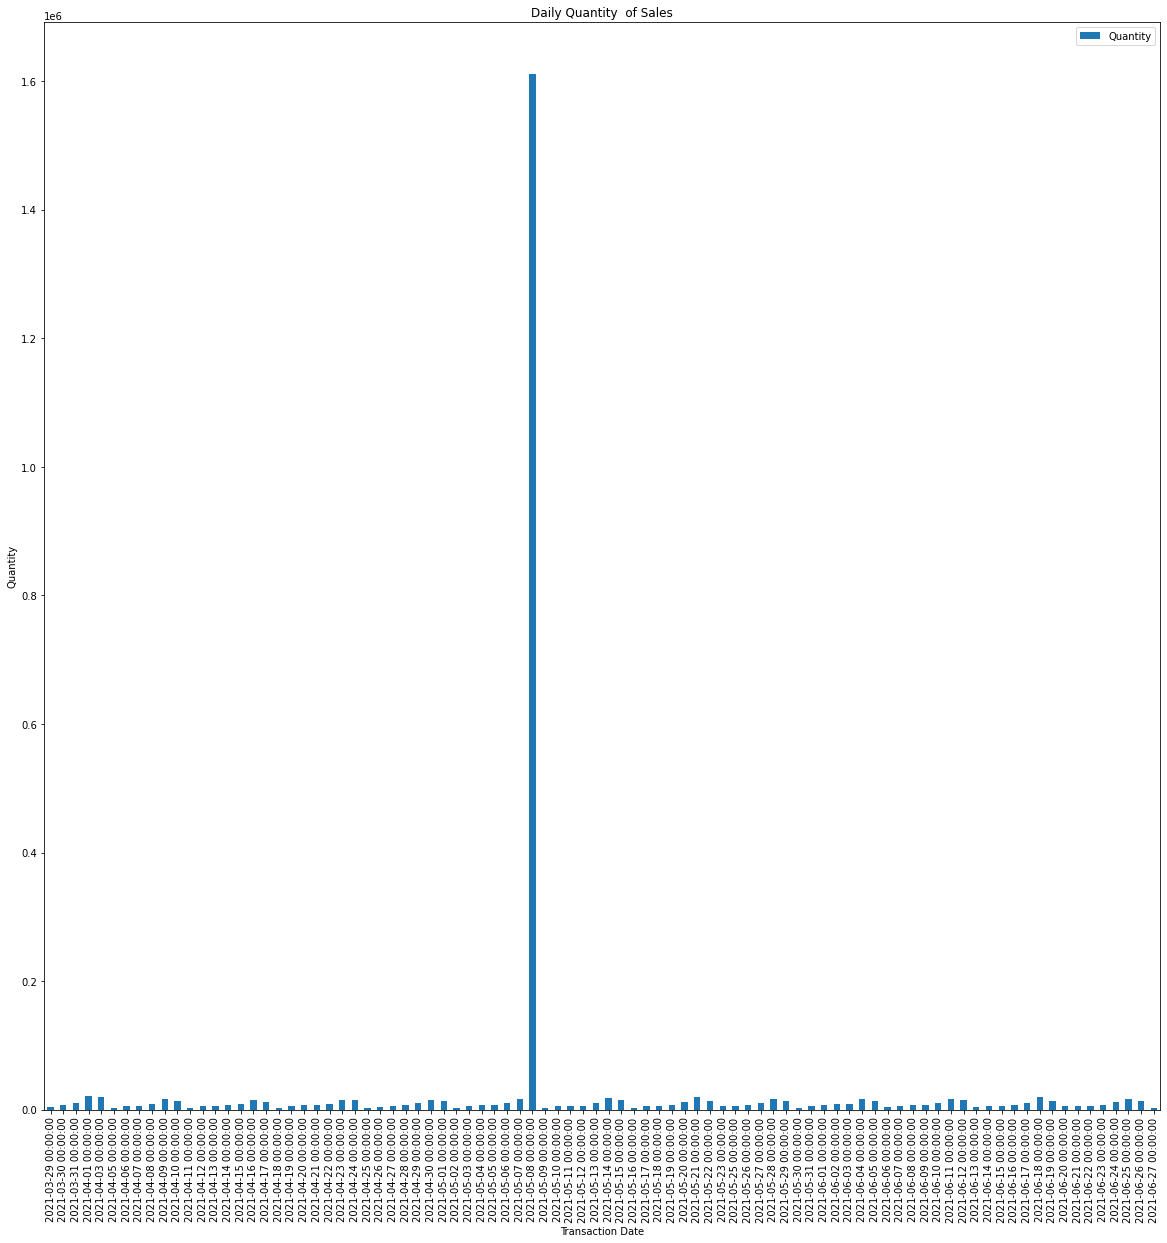

In [39]:
daily_sales.plot(kind='bar',x="TransactionDayId",figsize = (20,20),legend=True)
plt.title("Daily Quantity  of Sales")
plt.xlabel('Transaction Date')
plt.ylabel('Quantity')

The highest sales was made in 8th of May 2021 and the lowest was made in 5th of May 2121

Sales of each particular product 

In [78]:
site_sales =filteredsales_df.groupby(['SiteId','ProductId'])['Quantity'].sum().reset_index()
site_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14343 entries, 0 to 14342
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SiteId     14343 non-null  int64
 1   ProductId  14343 non-null  int64
 2   Quantity   14343 non-null  int64
dtypes: int64(3)
memory usage: 336.3 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fef09af0250>,
      dtype=object)

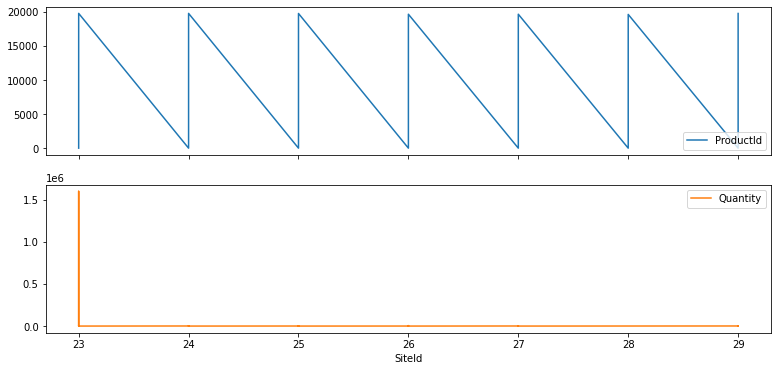

In [79]:
site_sales.plot.line(x="SiteId",subplots=True, legend=True,figsize = (13,6))

In [80]:
site_sales.sort_values(by='Quantity')

,SiteId,ProductId,Quantity
4218,24,14762,1
11352,28,1713,1
6755,25,14197,1
13194,29,6451,1
8654,26,8857,1
...,...,...,...
8071,26,6672,4378
2142,23,18847,4578
4955,24,18847,4878
9029,26,14165,5526


The highest quantity of sales was productid 178 with 1599302 in  sales in site 23. Followed by product id in site 26 14165

Number of sales according to the site

In [159]:
product_sales =filteredsales_df.groupby('ProductId')['Quantity'].sum().nlargest(10).reset_index()

In [157]:
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3046 entries, 0 to 3045
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ProductId  3046 non-null   int64
 1   Quantity   3046 non-null   int64
dtypes: int64(2)
memory usage: 47.7 KB


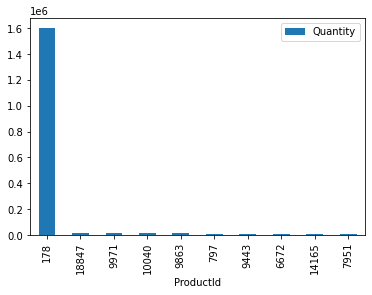

In [160]:
product_sales.plot(kind ='bar',x='ProductId',legend=True)

In [161]:
product_sales.sort_values(by='Quantity')

,ProductId,Quantity
9,7951,6851
8,14165,7606
7,6672,8581
6,9443,8848
5,797,11445
4,9863,12148
3,10040,14708
2,9971,14894
1,18847,18380
0,178,1601489


The highest product sold is productID 178 with 1601489 products sold irrespective of the site. Followed by productId 18847

In [144]:
promotions_df.head()

,StartDayId,EndDayId,ProgramId,ProductId,StatusName
0,2021-06-21,2021-08-01,3,5,Deleted
1,2021-06-21,2021-08-01,12,62,Invoiced
2,2021-05-10,2021-06-20,3,102,Invoiced
3,2021-06-21,2021-08-01,3,120,Invoiced
4,2021-06-21,2021-08-01,3,148,Invoiced


In [145]:
promotions_df.value_counts(ascending =True)

StartDayId  EndDayId    ProgramId  ProductId  StatusName
2021-03-29  2021-04-11  12         4303       Invoiced      1
2021-06-21  2021-08-01  3          6584       Invoiced      1
                                   6612       Rejected      1
                                   6627       Invoiced      1
                                   6641       Rejected      1
                                                           ..
2021-05-10  2021-06-20  3          7004       Invoiced      1
                                   7019       Invoiced      1
                                   7062       Deleted       1
                                   7101       Invoiced      1
2021-06-21  2021-08-01  298        19135      Invoiced      1
Length: 2681, dtype: int64

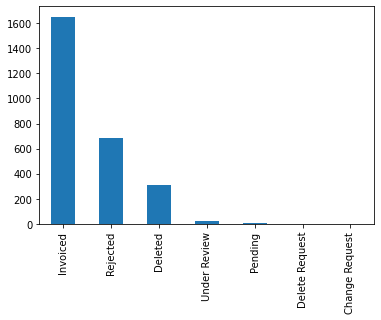

In [146]:
promotions_df['StatusName'].value_counts().plot.bar()

In [214]:
promotion_sales = promotions_df.groupby("StatusName")['ProductId'].value_counts().nlargest(10)
promotion_sales.head()


StatusName  ProductId
Rejected    11796        18
            12725        13
Deleted     11796        10
Rejected    12726        10
Invoiced    6699          9
Name: ProductId, dtype: int64

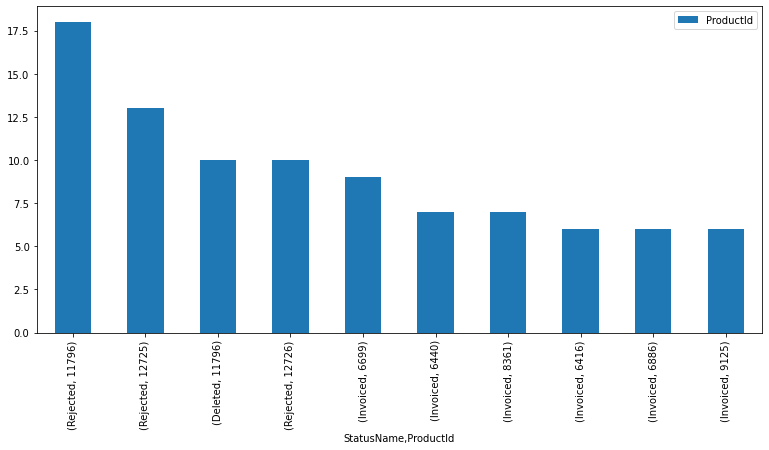

In [215]:
promotion_sales.plot(kind ='bar',legend=True,figsize = (13,6))

In [202]:
promotion_sales_least = promotions_df.groupby("StatusName")['ProductId'].value_counts().nsmallest(10)
promotion_sales_least

StatusName      ProductId
Change Request  6057         1
                11172        1
                17264        1
Delete Request  5695         1
Deleted         5            1
                185          1
                295          1
                381          1
                408          1
                834          1
Name: ProductId, dtype: int64

In [218]:
promos=promotions_df.groupby(["StatusName","ProductId"])['ProgramId']
promos.head()


0         3
1        12
2         3
3         3
4         3
       ... 
2727      9
2728    181
2729      3
2730      7
2731      3
Name: ProgramId, Length: 2637, dtype: int64

In [222]:
inventory_df.head()

,SiteId,DayId,ProductId,QtyOnHand
38,23,2021-03-29,39,87
65,23,2021-03-29,66,49
70,23,2021-03-29,71,6
101,23,2021-03-29,102,8
119,23,2021-03-29,120,18


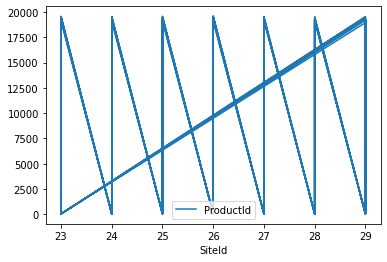

In [223]:
inventory_df.plot.line(x='SiteId',y='ProductId')

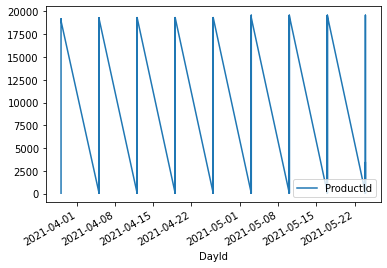

In [224]:
inventory_df.plot.line(x='DayId',y='ProductId')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fee92639650>],
      dtype=object)

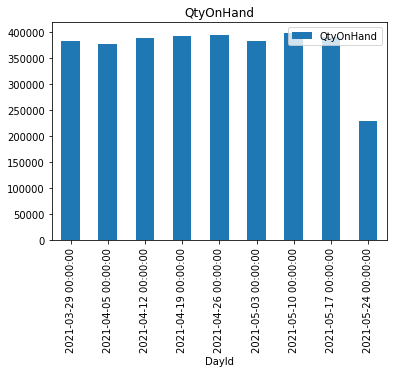

In [237]:
from IPython.core.pylabtools import figsize
inventory_qty =inventory_df.groupby(['DayId'])['QtyOnHand'].sum().reset_index()
inventory_qty.plot.bar(x ='DayId',subplots=True, legend = True)

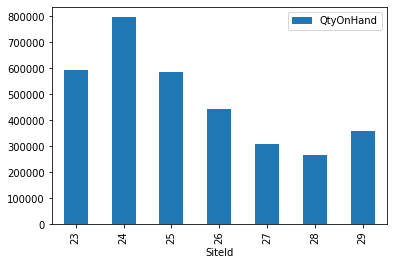

In [238]:
inventory_qty =inventory_df.groupby('SiteId')['QtyOnHand'].sum().reset_index()
inventory_qty.plot.bar(x ='SiteId', legend = True)

In [251]:
inventory_line_qty =inventory_df.groupby(['ProductId','SiteId'])['QtyOnHand'].sum().nlargest(10).reset_index()
inventory_line_qty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ProductId  10 non-null     int64
 1   SiteId     10 non-null     int64
 2   QtyOnHand  10 non-null     int64
dtypes: int64(3)
memory usage: 368.0 bytes


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feea0b09350>,
      dtype=object)

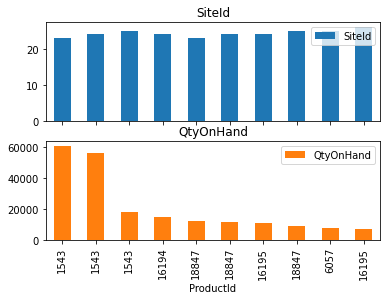

In [253]:
inventory_line_qty.plot(kind='bar',x="ProductId",subplots=True)

In [254]:
inventory_line_qty

,ProductId,SiteId,QtyOnHand
0,1543,23,60734
1,1543,24,56318
2,1543,25,18303
3,16194,24,14549
4,18847,23,12351
5,18847,24,11517
6,16195,24,11215
7,18847,25,9120
8,6057,25,7619
9,16195,26,6785


The highest product s was product is 1543 in site ID 23,24,25 with 6073,56318,18303 respectively.